In [92]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid Function

In [93]:
def sigmoid(z):
  """
  Sigmoid Function: σ(z) = 1 / (1 + e^(-z))
  Maps any real value to the (0,1) range
  """

  return 1 / (1 + np.exp(-z))

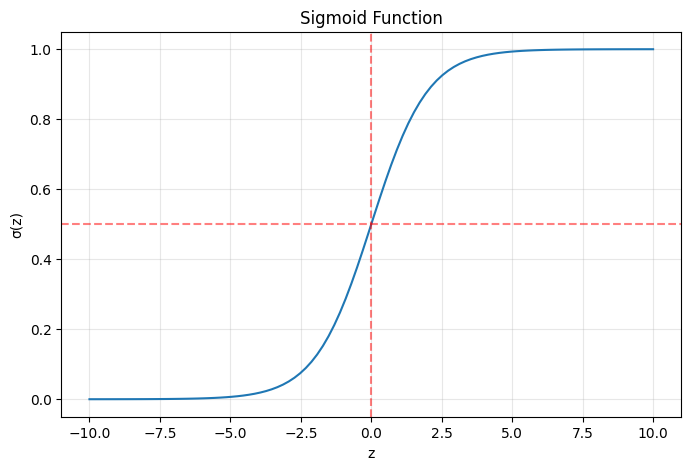

In [94]:
# Visualization
z = np.linspace(-10,10,100) # 100 evenly spaced points between -10 and 10
plt.figure(figsize=(8,5))
plt.plot(z,sigmoid(z))
plt.grid(True, alpha=0.3) # alpha is the transparency
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5) # Adding horizontal line
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5) # Adding vertical line
plt.show()

### Testing the property: 1 - σ(x) = σ(-x)

In [95]:
x = 3.14168
print(f"1 - σ({x}) = {1 - sigmoid(x):.6f}")
print(f"σ(-{x}) = {sigmoid(-x):.6f}")
print(f"Property holds: {np.isclose(1 - sigmoid(x), sigmoid(-x))}")  # Check if values are approximately equal

1 - σ(3.14168) = 0.041420
σ(-3.14168) = 0.041420
Property holds: True


##Sentiment Classification Example

In [96]:
class LogisticRegression:
  def __init__(self, n_features):
    """ Initializing weights and bias to zero""" ### In LogReg we initialize to 0 usually, but in deep learning to randomly close to 0 values breaking simmetry (if all weights started at zero, neurons would learn the same features)
    self.w = np.zeros(n_features)
    self.b = 0

  def predict_proba(self,x):
    """
    Compute P(y=1|x) with logistic regression
    x: feature vector
    """

    z = np.dot(self.w, x) + self.b # Linear combination: wx + b
    return(sigmoid(z))

  def predict(self,x):
    """Make binary the prediction using a .5 threshold"""
    return 1 if self.predict_proba(x) > 0.5 else 0

  def __call__(self):
    return("Logistic Regression Model with Weights: ", self.w, "Intercept:", self.b)

In [97]:
# Example from the book (sentiment analysis features)
features = {
    'positive_words': 3,      # Count of positive sentiment words
    'negative_words': 2,      # Count of negative sentiment words
    'has_no': 1,             # Binary: contains word "no"
    'pronouns': 3,           # Count of 1st/2nd person pronouns
    'has_exclamation': 0,    # Binary: contains "!"
    'log_word_count': 4.19   # Log of document length
}

# Converting dic to numpy array (order matters)
x = np.array([features['positive_words'],
              features['negative_words'],
              features['has_no'],
              features['pronouns'],
              features['has_exclamation'],
              features['log_word_count']
])

# Creating model with weights from the book
model = LogisticRegression(n_features=6)
model.w = np.array([2.5, -5.0, -1.2, 0.5, 2.0, 0.7])  # Learned weights from the book
model.b = 0.1

print(model())

# Calculate probabilities
prob_positive = model.predict_proba(x)
prob_negative = 1 - prob_positive

print(f"Feature vector x: {x}")
print(f"Weights w: {model.w}")
print(f"Bias b: {model.b}")
print(f"z = w·x + b = {np.dot(model.w, x) + model.b:.3f}")
print(f"P(positive|x) = {prob_positive:.2f}")
print(f"P(negative|x) = {prob_negative:.2f}")
print(f"Prediction: {'positive' if model.predict(x) == 1 else 'negative'}")


('Logistic Regression Model with Weights: ', array([ 2.5, -5. , -1.2,  0.5,  2. ,  0.7]), 'Intercept:', 0.1)
Feature vector x: [3.   2.   1.   3.   0.   4.19]
Weights w: [ 2.5 -5.  -1.2  0.5  2.   0.7]
Bias b: 0.1
z = w·x + b = 0.833
P(positive|x) = 0.70
P(negative|x) = 0.30
Prediction: positive


##Softmax Function for Multinomial Classification

In [98]:
def softmax(z):
  """
  Softmax Function for a vector z
  softmax(z_i) = exp(z_i) / Σ_j exp(z_j)
  """
  # Applying normalization to the vector to avoid overflow
  exp_z = np.exp(z - np.max(z)) # Substracting the top value to apply later a np.exp and use the ratios instead
  return (exp_z / np.sum(exp_z) ) # Relative distances stay the same



Input z: [ 0.6  1.1 -1.5  1.2  3.2 -1.1]
Softmax output: [0.05 0.09 0.01 0.1  0.74 0.01]
Sum of probabilities: 0.9999999999999999
z_matrix[:3]
[[-5.         0.         0.       ]
 [-4.8989899  0.         0.       ]
 [-4.7979798  0.         0.       ]]
probs[:3]:
[[0.00335766 0.49832117 0.49832117]
 [0.00371321 0.49814339 0.49814339]
 [0.00410626 0.49794687 0.49794687]]


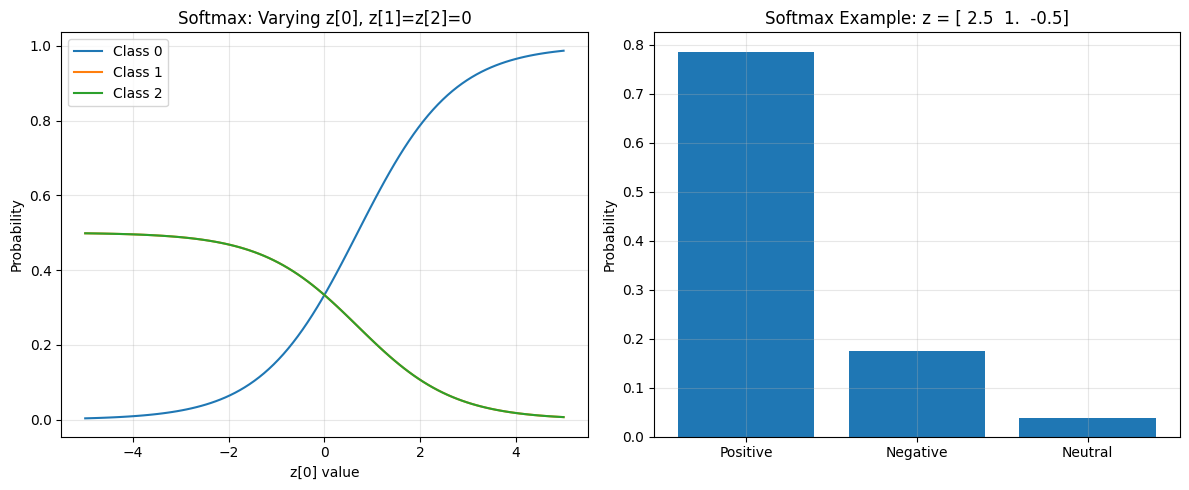

In [99]:
# Example from the textbook
z = np.array([0.6, 1.1, -1.5, 1.2, 3.2, -1.1])  # Raw scores (logits) for 6 classes
probabilities = softmax(z)

print("Input z:", z)
print("Softmax output:", np.round(probabilities, 2))
print("Sum of probabilities:", np.sum(probabilities))



### Visualization for 3 classes: both variable values and static
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

### ax1 left plot: one input variates the rest stay fixed
z_values = np.linspace(-5, 5, 100)

# Matix like [z_value, 0,0]
z_matrix = np.array([z_values, np.zeros_like(z_values), np.zeros_like(z_values)]).T
print("z_matrix[:3]")
print(z_matrix[:3])

probs = np.array([softmax(z_row) for z_row in z_matrix])
print("probs[:3]:")
print(probs[:3])

ax1.plot(z_values, probs[:,0], label= "Class 0")
ax1.plot(z_values, probs[:,1], label= "Class 1")
ax1.plot(z_values, probs[:,2], label= "Class 2")

ax1.set_xlabel('z[0] value')
ax1.set_ylabel('Probability')
ax1.set_title('Softmax: Varying z[0], z[1]=z[2]=0')
ax1.legend()
ax1.grid(True, alpha=0.3)


### ax2 right plot of constant logitss
classes = ['Positive', 'Negative', 'Neutral']
example_z = np.array([2.5, 1.0, -0.5])  # Logits for 3-way sentiment
example_probs = softmax(example_z)

ax2.bar(classes, example_probs)
ax2.set_ylabel('Probability')
ax2.set_title(f'Softmax Example: z = {example_z}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Cross-Entropy Loss Function


In [100]:
def cross_entropy_loss(y_true, y_pred):
  """
  Binary Cross-Entropy loss
  When y=1: only first term matters, when y=0: only second term matters
  L = -[(part that minimizes loss when the prediction asserts 1 ) + (part that maximizes penalization when the predictions of 1 fails )]
  L = -[       y * (log(ŷ) )     +     ( (1-y) * log(1-ŷ)     )]
  """

  epsilon = 1e-15 # for preventing log(0), which outputs as undefined
  y_pred = np.clip(y_pred, epsilon, 1 -epsilon) # limitting the value so it is defined


  return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))



## Example from the book

Model prediction: 0.7
Loss when true label is positive (y=1): 0.3567
Loss when true label is negative (y=0): 1.2040


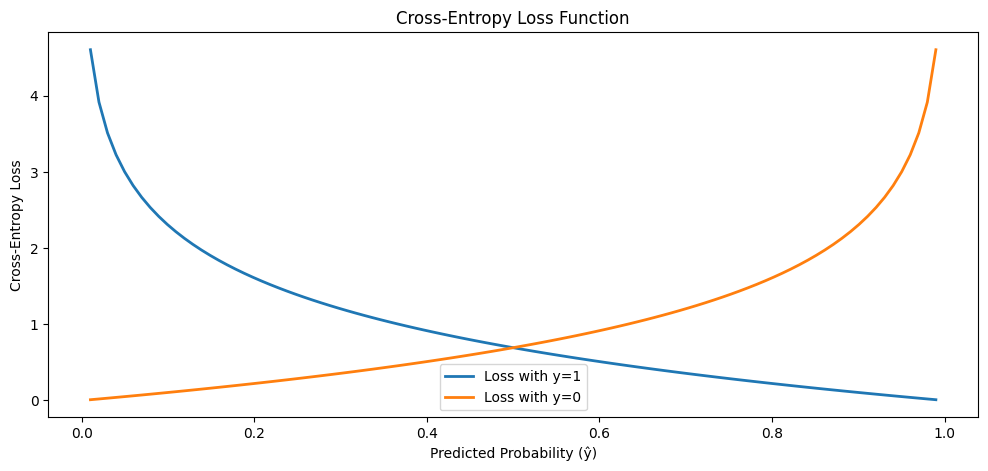

In [101]:
y_pred = 0.7
y_true_positive = 1 # + sentiment
y_true_negative = 0 # - sentiment

loss_correct = cross_entropy_loss(y_true_positive, y_pred) # Loss when prediction is correct
loss_incorrect = cross_entropy_loss(y_true_negative, y_pred) # Loss when prediction is incorrect

print(f"Model prediction: {y_pred}")
print(f"Loss when true label is positive (y=1): {loss_correct:.4f}")
print(f"Loss when true label is negative (y=0): {loss_incorrect:.4f}")

### Vis

y_pred_range = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 for numerical stability, log(0) not def
loss_when_y1 = cross_entropy_loss(1, y_pred_range)  # Loss curve when true label is 1
loss_when_y0 = cross_entropy_loss(0, y_pred_range)  # Loss curve when true label is 0


plt.figure(figsize=(12,5))

plt.xlabel('Predicted Probability (ŷ)')
plt.ylabel('Cross-Entropy Loss')


plt.plot(y_pred_range, loss_when_y1, label="Loss with y=1", linewidth=2)
plt.plot(y_pred_range, loss_when_y0, label="Loss with y=0", linewidth=2)



plt.title('Cross-Entropy Loss Function')
plt.legend()

plt.show()

## Gradient Descent

In [129]:
class LogisticRegressionWithGD:
  def __init__(self, n_features, learning_rate=0.1):
    self.w = np.zeros(n_features)
    self.b = 0
    self.learning_rate = learning_rate
    self.losses = []

  def forward(self, X):
    """Compute predictions for batch X"""
    z = np.dot(X, self.w) + self.b
    return sigmoid(z) # applying sigmoid element-wise

  def compute_loss(self, X, y):
    """Compute average cross-entropy loss over batch"""
    m = len(y) # num of examples
    y_pred = self.forward(X)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1-epsilon)

    # Average loss: (1/m) * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
    loss = -(1/m) * np.sum( y*np.log(y_pred) + (1-y) * np.log(1-y_pred) )
    return(loss)

  def compute_gradients(self, X, y):
    """Compute gradients using vectorized operations."""
    m = len(y) # Batch size
    y_pred = self.forward(X) # predictions

    # Gradient of weights: (1/m) * (ŷ - y)ᵀ X
    # Shape: (n_features,) = (m,) @ (m, n_features)
    dw = (1/m) *  np.dot((y_pred-y), X)

    # Gradient of bias: (1/m) * Σ(ŷ - y)
    db = (1/m) * np.sum(y_pred-y)

    print( "dw:", dw, "db: ", db)
    return( dw,db)



  def train_step(self, X, y):
    """One step of gradient descent"""

    # Calc gradients
    dw,db = self.compute_gradients(X,y)

    # Update params in opposite direction to gradients
    self.w -= self.learning_rate * dw
    self.b -= self.learning_rate * db

    # Track loss
    loss = self.compute_loss(X, y)
    self.losses.append(loss)

    return loss




Vertical Stack:  [[-1.00328585 -1.6382643 ]
 [-0.85231146  0.02302986]
 [-1.73415337 -1.73413696]
 [ 0.07921282 -0.73256527]
 [-1.96947439 -0.95743996]] 
... [[2.30040953 2.25429133]
 [2.68891337 2.20830385]
 [1.85144821 2.57015024]
 [1.47347874 0.61812535]
 [1.33693304 0.75509736]]
Horizontal Stack:  [0. 0. 0. 0. 0.] ... [1. 1. 1. 1. 1.]
X:  [[ 2.52406253  2.09252695]
 [ 3.16125921  1.04290374]
 [-3.10748323 -1.31536614]
 [ 2.57600714  1.52131165]
 [-2.25635075 -2.92225371]] ... [[-3.58192941  0.19645637]
 [-0.97805843 -1.20301533]
 [-1.5376347  -0.39669812]
 [ 0.52834327  0.12038184]
 [ 0.07957215 -2.02286003]]
y:  [1. 1. 0. 1. 0.] ... [0. 0. 0. 1. 0.]
dw: [-0.76479247 -0.76095962] db:  0.0
Epoch 0, Loss: 0.5849
dw: [-0.65895686 -0.65362708] db:  0.0016837315570010052
dw: [-0.57191742 -0.5654404 ] db:  0.002942153744135692
dw: [-0.5017045  -0.49438846] db:  0.0038156782600207643
dw: [-0.44514199 -0.4372259 ] db:  0.004393572085496101
dw: [-0.39922585 -0.39088525] db:  0.0047601874880

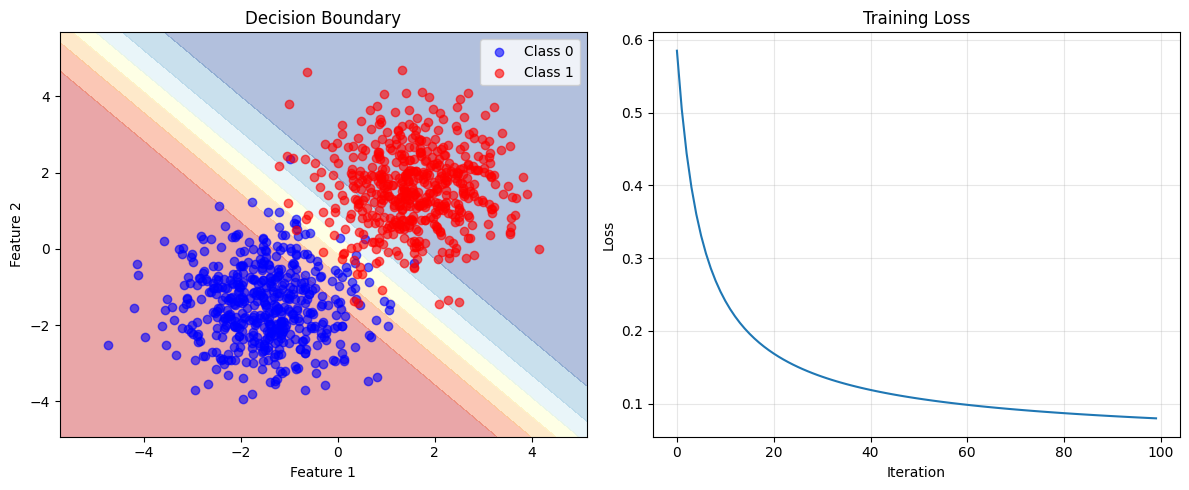


Final weights: [1.26569392 1.19030386]
Final bias: -0.030234764812459597


In [131]:
# Create synthetic dataset for binary classification
np.random.seed(42)  # For reproducibility
n_samples = 1000
n_features = 2

# Generating 2 classes with diff centers
X_class0 = np.random.randn(n_samples//2, n_features) - 1.5  # Centered at (-1.5, -1.5)
X_class1 = np.random.randn(n_samples//2, n_features) + 1.5  # Centered at (1.5, 1.5)

X = np.vstack([X_class0, X_class1]) # Vertical stack
print( "Vertical Stack: ", X[:5], "\n...", X[-5:])

y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])  # Labels: 0s then 1s
print( "Horizontal Stack: ", y[:5], "...", y[-5:])


# Shuffle data to mix classes
indices = np.random.permutation(n_samples)
X, y = X[indices], y[indices]

print( "X: ", X[:5], "...", X[-5:])
print( "y: ", y[:5], "...", y[-5:])


# Train model
model = LogisticRegressionWithGD(n_features=2, learning_rate=.1)

# Training
n_epochs = 100
for epoch in range(n_epochs):
  loss = model.train_step(X, y)

  if epoch % 10 == 0:
    print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax1.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax1.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0', alpha=0.6)
ax1.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1', alpha=0.6)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundary')
ax1.legend()

# Plot loss curve
ax2.plot(model.losses)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.set_title('Training Loss')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal weights: {model.w}")
print(f"Final bias: {model.b}")

In [102]:
S